## Playing around

In [10]:
import numpy as np
import pandas as pd

%matplotlib inline

In [4]:
dat = pd.read_csv('../../data/pediatric_patient_drug_reports.csv',index_col=0)

In [5]:
dat

,safetyreportid,age,atc_concept_id,atc_concept_name,meddra_concept_id,meddra_concept_name
0,10040842,8.0,21600005,sodium fluoride,36919098,Abnormal Behaviour
2,10040842,8.0,21600005,sodium fluoride,35607483,Vision Blurred
4,10298142,2.0,21600005,sodium fluoride,36211461,Drug Administration Error
6,10298142,2.0,21600005,sodium fluoride,36718555,Insomnia
8,10413313,14.0,21600005,sodium fluoride,35809327,Drug Ineffective
...,...,...,...,...,...,...
483001,12667800,16.0,21600493,ondansetron,36009738,Drug Hypersensitivity
483006,12667800,16.0,21600493,ondansetron,37622449,Hypotension
483011,12667800,16.0,21600493,ondansetron,37320164,Rash Erythematous
483016,12667800,16.0,21600493,ondansetron,35708208,Vomiting


## showing data characteristics and objects

In [6]:
type(dat)

pandas.core.frame.DataFrame

In [7]:
dat.age

0          8.0
2          8.0
4          2.0
6          2.0
8         14.0
          ... 
483001    16.0
483006    16.0
483011    16.0
483016    16.0
483021    20.0
Name: age, Length: 100000, dtype: float64

In [8]:
dat.atc_concept_id

0         21600005
2         21600005
4         21600005
6         21600005
8         21600005
            ...   
483001    21600493
483006    21600493
483011    21600493
483016    21600493
483021    21600493
Name: atc_concept_id, Length: 100000, dtype: int64

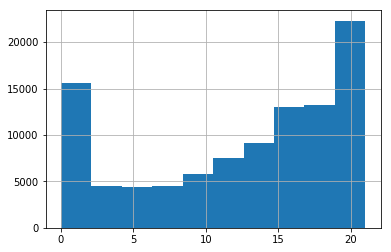

In [11]:
dat.age.hist()

## What are the top ten reported reactions?

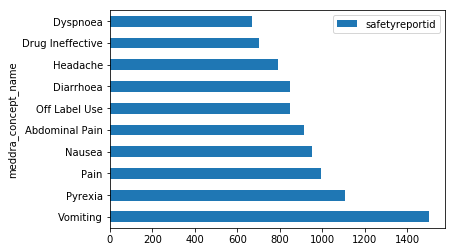

In [17]:
(dat.
 loc[:,['safetyreportid','meddra_concept_name']].
 drop_duplicates().
 groupby('meddra_concept_name').
 count().
 sort_values('safetyreportid',ascending=False).
 head(10).
 plot.barh()
)

## What are the top ten reported drugs?

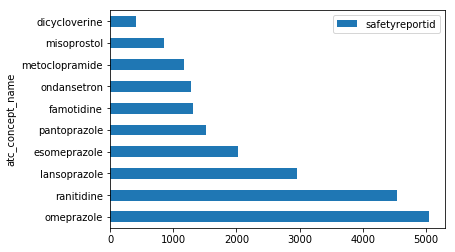

In [21]:
(dat.
loc[:,['atc_concept_name','safetyreportid']].
drop_duplicates().
groupby('atc_concept_name').
    count().
    sort_values('safetyreportid', ascending=False).
    head(10).
    plot.barh()
    )